<a href="https://colab.research.google.com/github/GrowToo/BusinessLogic/blob/master/Machine3-4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Імпорт необхідних бібліотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Бібліотеки для машинного навчання (Scikit-Learn)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

print("Бібліотеки успішно завантажено!")

Бібліотеки успішно завантажено!


In [ ]:
# Посилання на датасет (Red Wine Quality)
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"

# Читаємо файл (у цьому файлі дані розділені крапкою з комою ';')
df = pd.read_csv(url, sep=';')

# Виводимо перші 5 рядків, щоб переконатися, що все ок
print(f"Розмір датасету: {df.shape}")
df.head()

Розмір датасету: (1599, 12)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


--- 1. Завантаження даних ---
Розмір датасету: (1599, 12)
Розподіл класів:
target_class
1    800
0    799
Name: count, dtype: int64
Кількість у Train: 1279, Кількість у Test: 320

--- 2. Моделювання k-NN ---
k=1: Accuracy = 0.7812
k=2: Accuracy = 0.7219
k=3: Accuracy = 0.7344
k=4: Accuracy = 0.7312
k=5: Accuracy = 0.7063

Найкращий результат k-NN при k=1 з точністю 0.7812


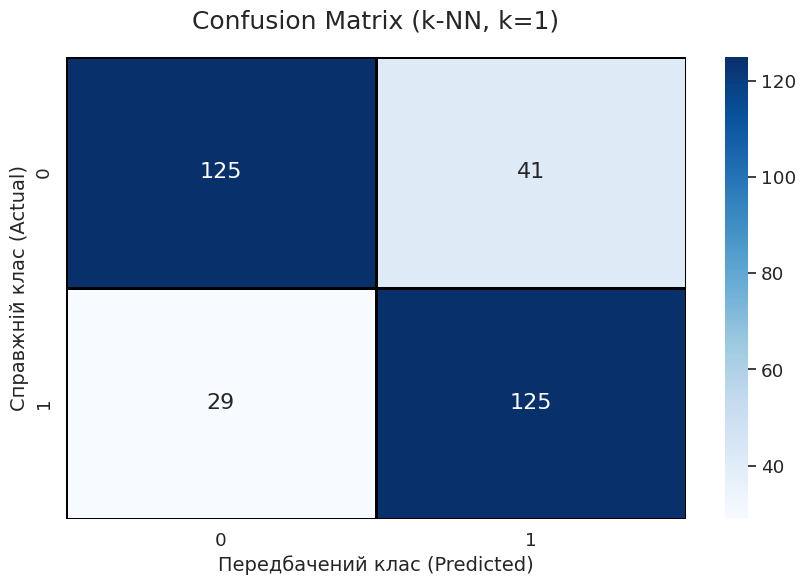


--- 3. Логістична регресія ---
Logistic Regression Accuracy: 0.7688


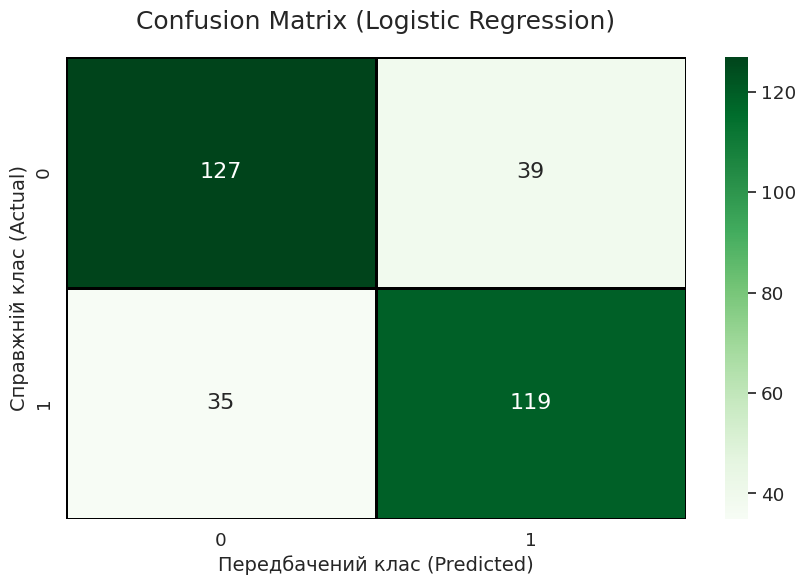


--- 4. Порівняння результатів ---
                 Model  Accuracy
0           k-NN (k=1)   0.78125
1  Logistic Regression   0.76875


/tmp/ipython-input-3674614801.py:129: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x='Model', y='Accuracy', data=comparison_df, palette="viridis")


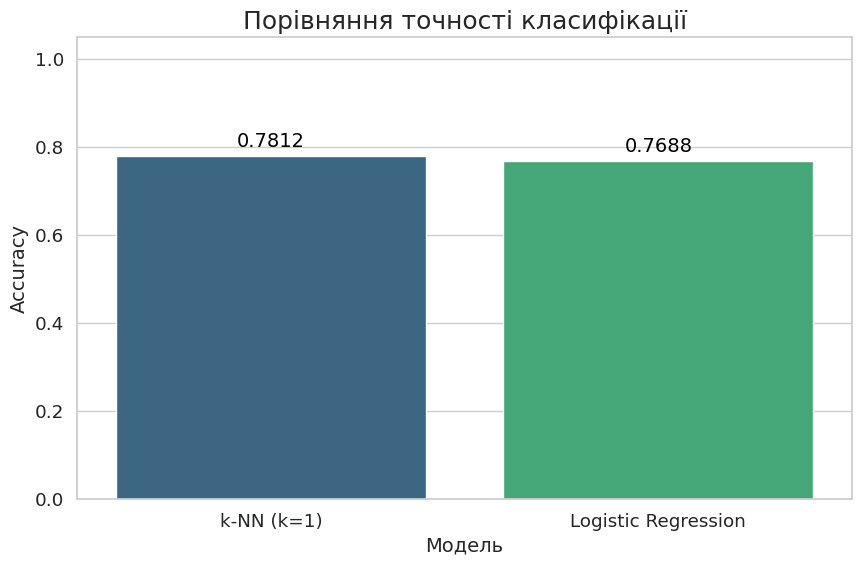

ВИСНОВОК: Метод k-NN виявився точнішим для цього набору даних.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# Налаштування стилю для графіків (збільшуємо шрифти)
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1.2)

# ==========================================
# 1. ЗАВАНТАЖЕННЯ ТА ПІДГОТОВКА ДАНИХ
# ==========================================
print("--- 1. Завантаження даних ---")
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
df = pd.read_csv(url, sep=';')

print(f"Розмір датасету: {df.shape}")

# Впорядкування масиву за зростанням значення y (quality)
df_sorted = df.sort_values(by='quality').reset_index(drop=True)

# Формування міток класів (розбиття на дві рівні частини)
n = len(df_sorted)
split_index = n // 2

# Створюємо нову колонку 'target_class': 0 - низька якість, 1 - висока якість
df_sorted['target_class'] = 0
df_sorted.loc[split_index:, 'target_class'] = 1

print(f"Розподіл класів:\n{df_sorted['target_class'].value_counts()}")

# Визначаємо матрицю ознак X та вектор цільової змінної y
X = df_sorted.drop(['quality', 'target_class'], axis=1)
y = df_sorted['target_class']

# Нормалізація даних (StandardScaler)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Розбиття на train та test (80/20)
# shuffle=True обов'язково, бо дані були відсортовані!
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, shuffle=True)

print(f"Кількість у Train: {len(X_train)}, Кількість у Test: {len(X_test)}")

# ==========================================
# 2. МЕТОД k-NN (k-найближчих сусідів)
# ==========================================
print("\n--- 2. Моделювання k-NN ---")

# Експерименти для значень k = 1, 2, 3, 4, 5
k_values = [1, 2, 3, 4, 5]
best_k = 0
best_acc = 0
best_cm = None
results_knn = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    results_knn.append(acc)

    print(f"k={k}: Accuracy = {acc:.4f}")

    if acc > best_acc:
        best_acc = acc
        best_k = k
        best_cm = confusion_matrix(y_test, y_pred)

print(f"\nНайкращий результат k-NN при k={best_k} з точністю {best_acc:.4f}")

# Візуалізація Confusion Matrix для найкращого k
plt.figure(figsize=(10, 6))
sns.heatmap(best_cm, annot=True, fmt='d', cmap='Blues',
            annot_kws={"size": 16}, linewidths=1, linecolor='black')
plt.title(f'Confusion Matrix (k-NN, k={best_k})', fontsize=18, pad=20)
plt.ylabel('Справжній клас (Actual)', fontsize=14)
plt.xlabel('Передбачений клас (Predicted)', fontsize=14)
plt.show()

# ==========================================
# 3. ЛОГІСТИЧНА РЕГРЕСІЯ
# ==========================================
print("\n--- 3. Логістична регресія ---")

# Побудова моделі
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Прогноз
y_pred_log = log_reg.predict(X_test)

# Оцінка
acc_log = accuracy_score(y_test, y_pred_log)
cm_log = confusion_matrix(y_test, y_pred_log)

print(f"Logistic Regression Accuracy: {acc_log:.4f}")

# Візуалізація Confusion Matrix
plt.figure(figsize=(10, 6))
sns.heatmap(cm_log, annot=True, fmt='d', cmap='Greens',
            annot_kws={"size": 16}, linewidths=1, linecolor='black')
plt.title('Confusion Matrix (Logistic Regression)', fontsize=18, pad=20)
plt.ylabel('Справжній клас (Actual)', fontsize=14)
plt.xlabel('Передбачений клас (Predicted)', fontsize=14)
plt.show()

# ==========================================
# 4. ПОРІВНЯННЯ ТА ВИСНОВКИ
# ==========================================
print("\n--- 4. Порівняння результатів ---")

models = [f'k-NN (k={best_k})', 'Logistic Regression']
accuracies = [best_acc, acc_log]

comparison_df = pd.DataFrame({'Model': models, 'Accuracy': accuracies})
print(comparison_df)

# Графік порівняння
plt.figure(figsize=(10, 6))
barplot = sns.barplot(x='Model', y='Accuracy', data=comparison_df, palette="viridis")
plt.ylim(0, 1.05)
plt.title('Порівняння точності класифікації', fontsize=18)
plt.ylabel('Accuracy', fontsize=14)
plt.xlabel('Модель', fontsize=14)

# Додаємо підписи значень на стовпчики
for index, row in comparison_df.iterrows():
    barplot.text(index, row.Accuracy + 0.02, f'{row.Accuracy:.4f}',
                 color='black', ha="center", fontsize=14)

plt.show()

if best_acc > acc_log:
    print("ВИСНОВОК: Метод k-NN виявився точнішим для цього набору даних.")
else:
    print("ВИСНОВОК: Логістична регресія виявилася точнішою для цього набору даних.")

--- 1. Підготовка даних ---
Train size: 1279, Test size: 320

--- 2. Метод ліктя (Elbow Method) ---


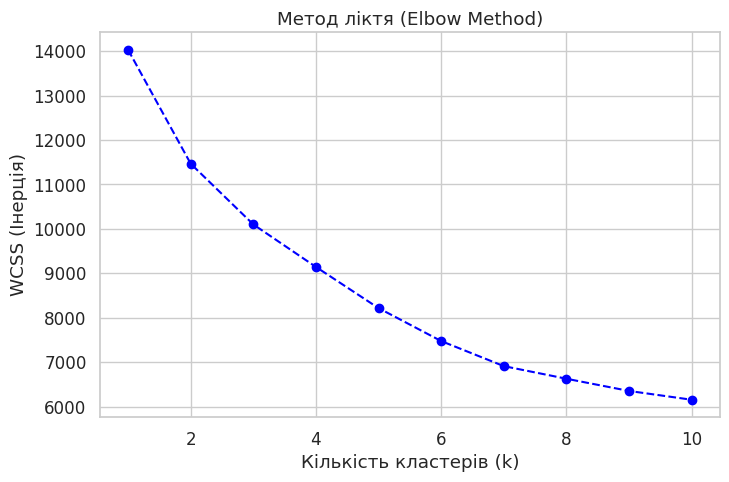

Аналіз графіку: шукаємо точку згину ('лікоть'). Зазвичай це 2 або 3.

--- 3. Кластеризація k-Means ---


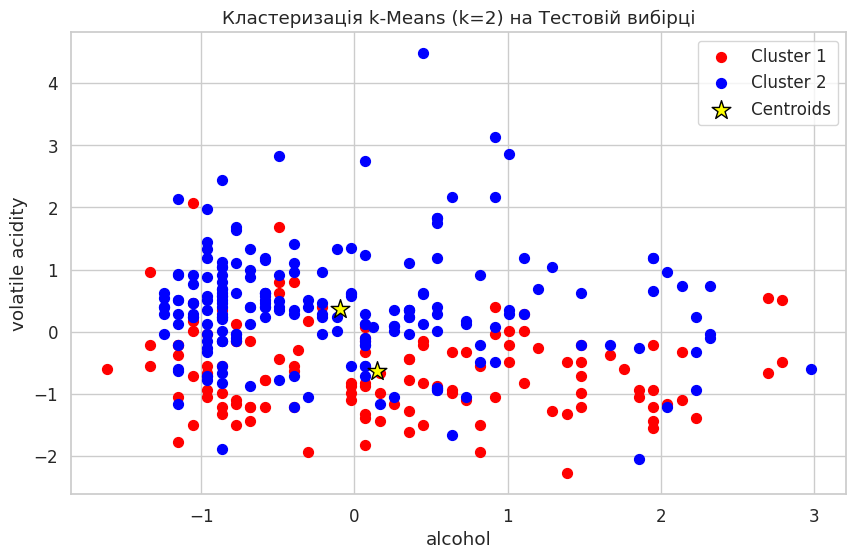


--- 4. Ієрархічна кластеризація ---


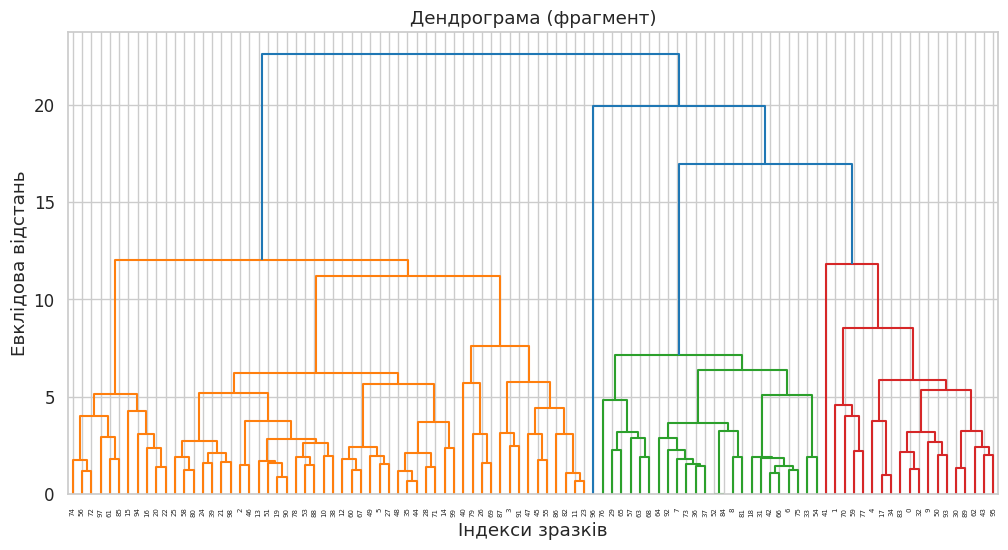


--- 5. Порівняння: Кластеризація vs Класифікація ---

Матриця порівняння (Actual Class vs k-Means Cluster):
k-Means Cluster    0    1
Actual Class (y)         
0                 42  124
1                 80   74

--- Аналіз збігу ---
Точність k-NN (Класифікація): 0.7812
Умовна точність k-Means (Кластеризація): 0.6375
(Це показує, наскільки структура кластерів збігається з класами 'якості')


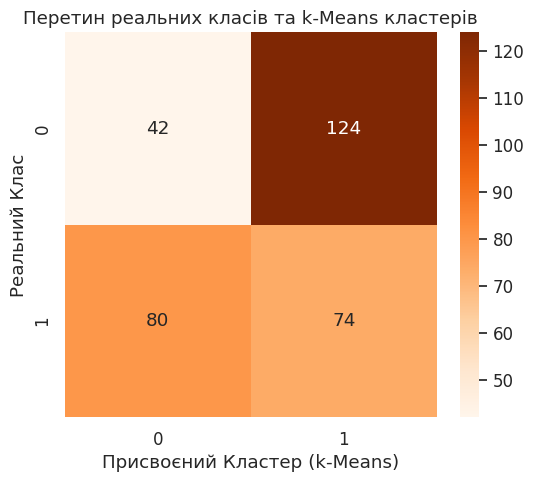

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Бібліотеки для ML та Кластеризації
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
import scipy.cluster.hierarchy as sch

# Налаштування графіків
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1.1)

# ==========================================
# 1. ПІДГОТОВКА ДАНИХ (Як у Завданні 3)
# ==========================================
print("--- 1. Підготовка даних ---")
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
df = pd.read_csv(url, sep=';')

# Впорядкування та виділення X, Y
df_sorted = df.sort_values(by='quality').reset_index(drop=True)

# Формування класів (для порівняння в кінці)
n = len(df_sorted)
split_index = n // 2
df_sorted['target_class'] = 0
df_sorted.loc[split_index:, 'target_class'] = 1

X = df_sorted.drop(['quality', 'target_class'], axis=1)
y = df_sorted['target_class'] # Це наші "істинні" мітки

# Нормалізація
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
# Зберігаємо назви колонок для графіків
feature_names = X.columns

# Розбиття на train/test (80/20)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, shuffle=True)

print(f"Train size: {len(X_train)}, Test size: {len(X_test)}")

# ==========================================
# 2. МЕТОД ELBOW (Вибір кількості кластерів)
# ==========================================
print("\n--- 2. Метод ліктя (Elbow Method) ---")
# Побудувати графік інерції (WCSS)
wcss = []
k_range = range(1, 11)

for i in k_range:
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(X_train)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(k_range, wcss, marker='o', linestyle='--', color='b')
plt.title('Метод ліктя (Elbow Method)')
plt.xlabel('Кількість кластерів (k)')
plt.ylabel('WCSS (Інерція)')
plt.show()
print("Аналіз графіку: шукаємо точку згину ('лікоть'). Зазвичай це 2 або 3.")

# ==========================================
# 3. K-MEANS КЛАСТЕРИЗАЦІЯ
# ==========================================
print("\n--- 3. Кластеризація k-Means ---")
# Кластеризація для k=2, 3, 4 (Ми детально розглянемо k=2 для порівняння)

# Навчаємо модель на Train для k=2
kmeans_2 = KMeans(n_clusters=2, init='k-means++', random_state=42, n_init=10)
kmeans_2.fit(X_train)

# Призначити тестовим точкам кластери
y_kmeans_test = kmeans_2.predict(X_test)

# Парні графіки кластерів (Pairwise scatter plots)
# Візьмемо дві виразні ознаки: 'alcohol' (індекс 10) та 'volatile acidity' (індекс 1)
# X_test - це numpy array, тому звертаємось за індексами стовпців
feat1_idx, feat2_idx = 10, 1 # Alcohol vs Volatile Acidity

plt.figure(figsize=(10, 6))
plt.scatter(X_test[y_kmeans_test == 0, feat1_idx], X_test[y_kmeans_test == 0, feat2_idx],
            s=50, c='red', label='Cluster 1')
plt.scatter(X_test[y_kmeans_test == 1, feat1_idx], X_test[y_kmeans_test == 1, feat2_idx],
            s=50, c='blue', label='Cluster 2')

# Центроїди
plt.scatter(kmeans_2.cluster_centers_[:, feat1_idx], kmeans_2.cluster_centers_[:, feat2_idx],
            s=200, c='yellow', marker='*', edgecolors='black', label='Centroids')

plt.title('Кластеризація k-Means (k=2) на Тестовій вибірці')
plt.xlabel(feature_names[feat1_idx])
plt.ylabel(feature_names[feat2_idx])
plt.legend()
plt.show()

# ==========================================
# 4. ІЄРАРХІЧНА КЛАСТЕРИЗАЦІЯ
# ==========================================
print("\n--- 4. Ієрархічна кластеризація ---")
# Дендрограма (будуємо для частини даних, щоб було читабельно)
plt.figure(figsize=(12, 6))
dendrogram = sch.dendrogram(sch.linkage(X_train[:100], method='ward')) # Перші 100 точок
plt.title('Дендрограма (фрагмент)')
plt.xlabel('Індекси зразків')
plt.ylabel('Евклідова відстань')
plt.show()

# Агломеративна кластеризація для порівняння (k=2)
hc = AgglomerativeClustering(n_clusters=2, metric='euclidean', linkage='ward')
y_hc_test = hc.fit_predict(X_test)

# ==========================================
# 5. ПОРІВНЯННЯ З КЛАСИФІКАЦІЄЮ (k-NN)
# ==========================================
print("\n--- 5. Порівняння: Кластеризація vs Класифікація ---")

# Відтворюємо k-NN з минулого завдання (k=1, як кращий варіант)
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
y_knn_pred = knn.predict(X_test)

# Порівняння результатів
# Створимо DataFrame для наочності
comparison_df = pd.DataFrame({
    'Actual Class (y)': y_test,
    'k-NN Prediction': y_knn_pred,
    'k-Means Cluster': y_kmeans_test,
    'Hierarchical Cluster': y_hc_test
})

print("\nМатриця порівняння (Actual Class vs k-Means Cluster):")
# Це показує, як кластери "лягають" на реальні класи
crosstab = pd.crosstab(comparison_df['Actual Class (y)'], comparison_df['k-Means Cluster'])
print(crosstab)

print("\n--- Аналіз збігу ---")
# Оскільки кластери можуть мати мітки 0/1 обернені до класів, перевіримо обидва варіанти
match_direct = np.mean(y_kmeans_test == y_test)
match_inverted = np.mean(y_kmeans_test == (1 - y_test))
cluster_acc = max(match_direct, match_inverted)

print(f"Точність k-NN (Класифікація): {accuracy_score(y_test, y_knn_pred):.4f}")
print(f"Умовна точність k-Means (Кластеризація): {cluster_acc:.4f}")
print("(Це показує, наскільки структура кластерів збігається з класами 'якості')")

# Графік порівняння
plt.figure(figsize=(6, 5))
sns.heatmap(crosstab, annot=True, fmt='d', cmap='Oranges')
plt.title('Перетин реальних класів та k-Means кластерів')
plt.ylabel('Реальний Клас')
plt.xlabel('Присвоєний Кластер (k-Means)')
plt.show()